# <a href="https://thetahat.ru/courses/bm-hf-2025-spr" target="_top" >Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 2 &mdash; часть В

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* Прислать нужно **ноутбук в формате ipynb**. Другие форматы не принимаются.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* **Если код студента недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

<font size="5">Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.</font>

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

----

### Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Пусть выборка $X_1, ... X_{100}$ имеет распределение $Bern(\theta)$. <a href="https://thetahat.ru/courses/python/05" target="_top" >Сгенерируйте</a> такую выборку, взяв $\theta=1/2$. Для каждой подвыборке вида $X_1, ... X_i$, $1 \le i \le 100$ постройте асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha=0.95$. Формула для интервала была выведена на семинаре. Постройте график зависимости доверительного интервала от размера выборки (см. <a href="https://thetahat.ru/courses/bm-hf-2025-spr/stat/3/seminar3" target="_top">код с семинара</a>). 

Аналогичные действия выполните для выборки из распределения Лапласса с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$, сгенерировав выборку для $\theta=0$.

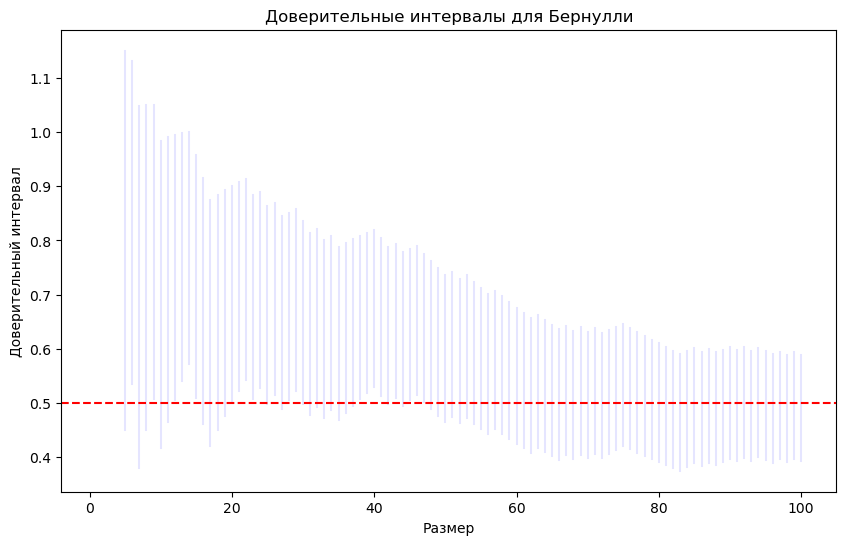

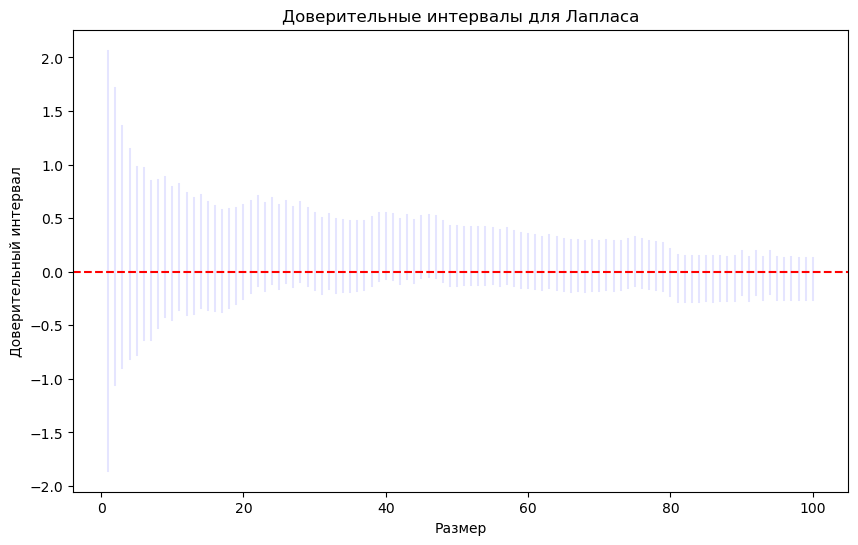

In [16]:


np.random.seed(0)
theta = 0.5
n = 100
l_l = np.random.binomial(n=1,p=theta,size=n)
z = sps.norm.ppf(0.975)
c_b = []
for i in range(1, n+1):
    p_h = np.mean(l_b[:i])
    se = np.sqrt(p_h*(1-p_h)/i)
    c_b.append((p_h - z*se, p_h+z*se))
plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot([i+1, i+1], c_b[i], color='blue', alpha=0.1)
plt.axhline(theta, color='red', linestyle='--')
plt.xlabel('Размер')
plt.ylabel('Доверительный интервал')
plt.title('Доверительные интервалы для Бернулли')
plt.show()


np.random.seed(0)
theta_l = 0
l_l = np.random.laplace(loc=theta_l,scale=1,size=n)
c_l = []
for i in range(1, n+1):
    med_h = np.median(l_l[:i])
    se_l = 1/np.sqrt(i)
    c_l.append((med_h - z*se_l, med_h+z*se_l))
plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot([i+1, i+1], c_l[i], color='blue', alpha=0.1)
plt.axhline(theta_l, color='red', linestyle='--')
plt.xlabel('Размер')
plt.ylabel('Доверительный интервал')
plt.title('Доверительные интервалы для Лапласа')
plt.show()


**Вывод:** При увеличении размера выборки доверительные интервалы сужаются что подтверждает асимптотическую нормальность оценок.

__________________
### Задача 5

Если у вас еще не установлена <a href="https://thetahat.ru/courses/python/07" target="_top" >библиотека `seaborn`</a> для получения красивых графиков, поставьте ее.

In [17]:
import seaborn as sns
sns.set(font_scale=1.2, palette='Set2')

Загрузим данные <a target="_blank" href="https://ru.wikipedia.org/wiki/Ирисы_Фишера">"Ирисы Фишера"</a> о цветках ириса различных сортов и посмотрим на первые пять строк таблицы. Для хранения данных используется <a href="https://thetahat.ru/courses/python/06" target="_top" >класс `DataFrame`</a> <a href="https://thetahat.ru/courses/python/06" target="_top">библиотеки `pandas`</a>.

In [18]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Столбцы отвечают за длину и ширину чашелистика и лепестка соответственно, а так же за тип цветка (setosa, virginica, versicolor).

Вектор значений первого столбца можно получить так

In [19]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

Первую строку можно получить так

In [20]:
df.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

Таблица с данными только по сорту virginica извлекается следующим образом

In [21]:
df[df['species'] == 'virginica']

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


Визуализируем данные по двумерным проекциям. Цветом обозначен тип цветка.

/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:1659: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  func(x, y, **kws)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:1659: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  func(x, y, **kws)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:1659: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  func(x, y, **kws)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:1659: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  func(x, y, **kws)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:1659: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  func(x, y, **kws)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:1659: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


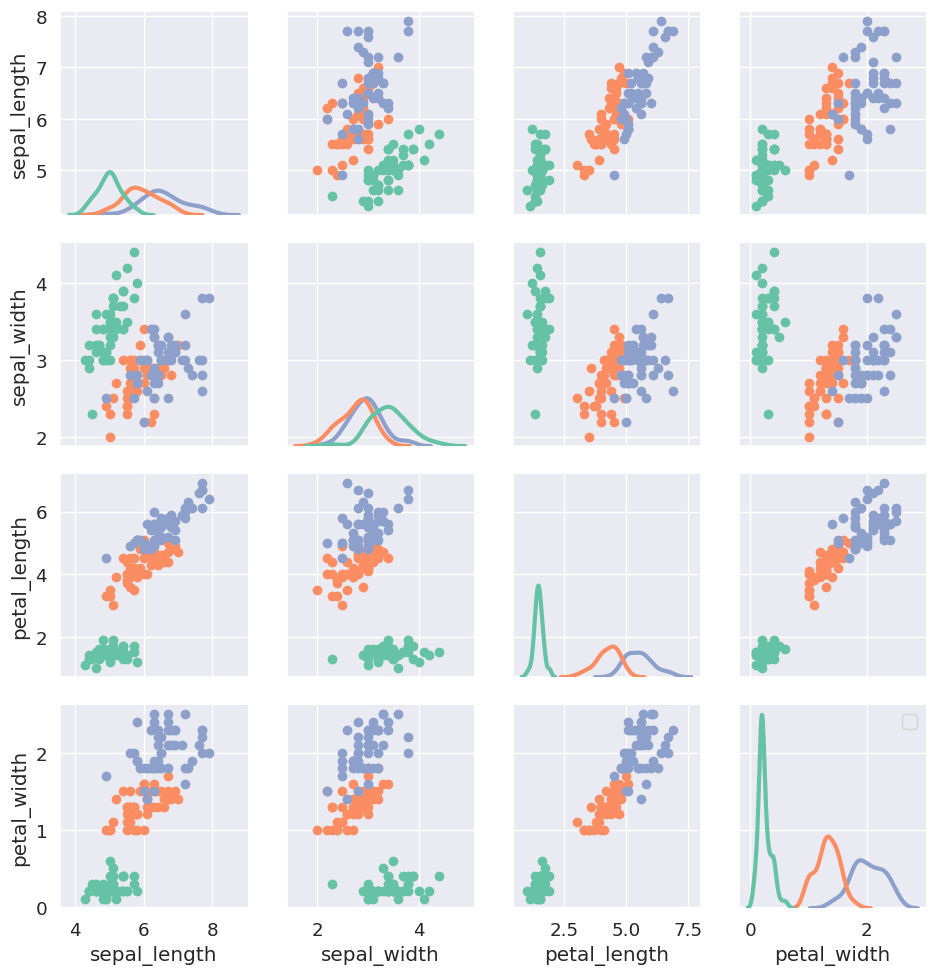

In [25]:
g = sns.PairGrid(df, hue='species')
g.map_offdiag(plt.scatter, cmap ="Blues_d")
g.map_diag(sns.kdeplot, lw=3)
plt.legend()

Для каждой характеристики цветка и каждого типа цветка проверьте с помощью <a href="https://thetahat.ru/courses/bm-hf-2025-spr/stat/3/seminar3" target="_top">критерия Шапиро-Уилка</a>, является ли соответствующая выборка нормальной с уровнем значимости $\alpha=0.05$. Всего нужно совешить 12 проверок (4 характеристики, 3 типа). Например, нужно проверить, является ли выборка `df[df['species'] == 'virginica']['sepal_length']` нормальной.

In [26]:
species = df['species'].unique()
features = df.columns[:-1]

alpha = 0.05
ress = {}
for s in species:
    for f in features:
        sample = df[df['species'] == s][f]
        stat, p = sps.shapiro(sample)
        ress[(s, f)] = p > alpha

for key, value in ress.items():
    print(f"{key[0]} - {key[1]}: {value}")

setosa - sepal_length: True
setosa - sepal_width: True
setosa - petal_length: True
setosa - petal_width: False
versicolor - sepal_length: True
versicolor - sepal_width: True
versicolor - petal_length: True
versicolor - petal_width: False
virginica - sepal_length: True
virginica - sepal_width: True
virginica - petal_length: True
virginica - petal_width: True


Теперь для каждой характеристики для всех пар типов цветка проверьте с уровнем значимости $\alpha=0.05$, отличаются ли значения данной харатеристики для этих типов цветков (см. <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/3/seminar3_presentation.pdf" target="_top">презентацию с семинара</a>). Если для обеих выборок нормальность выше не отверглась, используйте <a href="hhttps://thetahat.ru/files/bm-hf-2025-spr/stat/3/seminar3.html#T-критерий-Стьюдента-—-независимые-выборки" target="_top">критерий Стьюдента</a>, иначе пользуйтесь <a href="https://thetahat.ru/files/bm-hf-2025-spr/stat/3/seminar3.html#Критерий-Смирнова" target="_top">критерием Смирнова</a>. Например, нужно проверить, отличаются ли распределения выборкок `df[df['species'] == 'setosa']['sepal_length']` и `df[df['species'] == 'virginica']['sepal_length']`.

*Замечание*. Для применения критерия Стьюдента было бы правильнее предварительно проверить, что дисперсии выборок совпадает, но в данном задании это можно не делать.

In [30]:
species = df['species'].unique()
features = df.columns[:-1]
pairs = [('setosa', 'virginica'), ('setosa', 'versicolor'), ('virginica', 'versicolor')]
results = {}

for pair in pairs:
    s1, s2 = pair
    for f in features:
        sample1 = df[df['species'] == s1][f]
        sample2 = df[df['species'] == s2][f]
        normal1 = ress[(s1, f)]
        normal2 = ress[(s2, f)]
        if normal1 and normal2:
            stat, p = sps.ttest_ind(sample1, sample2)
        else:
            stat, p = sps.ks_2samp(sample1, sample2)
        results[(pair, f)] = p < alpha

for key, value in results.items():
    print(f"{key[0][0]} - {key[0][1]} : {key[1]}: {value}")

setosa - virginica : sepal_length: True
setosa - virginica : sepal_width: True
setosa - virginica : petal_length: True
setosa - virginica : petal_width: True
setosa - versicolor : sepal_length: True
setosa - versicolor : sepal_width: True
setosa - versicolor : petal_length: True
setosa - versicolor : petal_width: True
virginica - versicolor : sepal_length: True
virginica - versicolor : sepal_width: True
virginica - versicolor : petal_length: True
virginica - versicolor : petal_width: True


**Вывод:**  petal_length все виды различаются, это видно на визуализации, sepal_width различия менее заметны

__________________
### Задача 6

Сколько проверок статистических гипотез пришлось совершить в предыдущей задачи?

24: 12 сравнений и 12 проверок на нормальность

Каким числом ограничена вероятность ошибки первого рода в каждой проверке?

0.05

Такую ошибку мы могли совершить в каждой проверке. Вероятность совершения хотя бы одной ошибки первого рода среди всех проверок не превосходит произведения указанных вами чисел. Но нам хотелось бы, чтобы вероятность совершения хотя бы одной ошибки первого рода не превосходила $\alpha=0.05$. Можете ли вы предложить решение данной проблемы?

Поправка Бонферрони - заменить $\alpha$ на $\frac{\alpha}{n}$, где $n$ - количество проверок

Реализуйте этот способ для предыдущей задачи

In [32]:
species = df['species'].unique()
features = df.columns[:-1]

alpha = 0.05 / 24
ress = {}
for s in species:
    for f in features:
        sample = df[df['species'] == s][f]
        stat, p = sps.shapiro(sample)
        ress[(s, f)] = p > alpha

for key, value in ress.items():
    print(f"{key[0]} - {key[1]}: {value}")

print('\n')

pairs = [('setosa', 'virginica'), ('setosa', 'versicolor'), ('virginica', 'versicolor')]
results = {}

for pair in pairs:
    s1, s2 = pair
    for f in features:
        sample1 = df[df['species'] == s1][f]
        sample2 = df[df['species'] == s2][f]
        normal1 = ress[(s1, f)]
        normal2 = ress[(s2, f)]
        if normal1 and normal2:
            stat, p = sps.ttest_ind(sample1, sample2)
        else:
            stat, p = sps.ks_2samp(sample1, sample2)
        results[(pair, f)] = p < alpha

for key, value in results.items():
    print(f"{key[0][0]} - {key[0][1]} : {key[1]}: {value}")

setosa - sepal_length: True
setosa - sepal_width: True
setosa - petal_length: True
setosa - petal_width: False
versicolor - sepal_length: True
versicolor - sepal_width: True
versicolor - petal_length: True
versicolor - petal_width: True
virginica - sepal_length: True
virginica - sepal_width: True
virginica - petal_length: True
virginica - petal_width: True


setosa - virginica : sepal_length: True
setosa - virginica : sepal_width: True
setosa - virginica : petal_length: True
setosa - virginica : petal_width: True
setosa - versicolor : sepal_length: True
setosa - versicolor : sepal_width: True
setosa - versicolor : petal_length: True
setosa - versicolor : petal_width: True
virginica - versicolor : sepal_length: True
virginica - versicolor : sepal_width: True
virginica - versicolor : petal_length: True
virginica - versicolor : petal_width: True


***Вывод:** в данном случае отвергнута только одна гипотеза, в отличие от двух в предыдущем номере, что позволит нам суммарно отвергнуть меньше правильных гипотез.